In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
from pprint import pprint 
import matplotlib.pyplot as plt
import subprocess
import seaborn as sns

In [33]:
df = pd.read_csv('df_merged_all.csv')
df.head()

,Unnamed: 0,Year,country code,Continent,CPI,date,depth,mag,mmi,Population density (people per sq. km of land area),...,Rural population (% of total population),Urban population,Urban population (% of total population),Urban population growth (annual %),GDP (constant 2015 US$),GDP (current US$),GDP growth (annual %),GDP per capita (constant 2015 US$),country,Total Affected
0,0,1960,CHL,Americas,11.427251,1960-05-22,25.0,9.5,8.842,..,...,32.164,5517094,67.836,..,27084687058.6456,4110000000,..,3330.22587253855,Chile,2003000.0
1,1,1960,CHL,Americas,11.427251,1960-05-22,25.0,7.8,7.274,..,...,32.164,5517094,67.836,..,27084687058.6456,4110000000,..,3330.22587253855,Chile,2003000.0
2,2,1960,CHL,Americas,11.427251,1960-05-22,25.0,6.8,6.925,..,...,32.164,5517094,67.836,..,27084687058.6456,4110000000,..,3330.22587253855,Chile,2003000.0
3,3,1960,CHL,Americas,11.427251,1960-05-22,25.0,7.1,7.112,..,...,32.164,5517094,67.836,..,27084687058.6456,4110000000,..,3330.22587253855,Chile,2003000.0
4,4,1960,CHL,Americas,11.427251,1960-05-22,25.0,5.8,5.841,..,...,32.164,5517094,67.836,..,27084687058.6456,4110000000,..,3330.22587253855,Chile,2003000.0


In [34]:
df.columns

Index(['Unnamed: 0', 'Year', 'country code', 'Continent', 'CPI', 'date',
       'depth', 'mag', 'mmi',
       'Population density (people per sq. km of land area)',
       'Population growth (annual %)', 'Population in largest city',
       'Population in the largest city (% of urban population)',
       'Population, total', 'Rural population',
       'Rural population (% of total population)', 'Urban population',
       'Urban population (% of total population)',
       'Urban population growth (annual %)', 'GDP (constant 2015 US$)',
       'GDP (current US$)', 'GDP growth (annual %)',
       'GDP per capita (constant 2015 US$)', 'country', 'Total Affected'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 25 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Unnamed: 0                                              1011 non-null   int64  
 1   Year                                                    1011 non-null   int64  
 2   country code                                            1011 non-null   object 
 3   Continent                                               1011 non-null   object 
 4   CPI                                                     1011 non-null   float64
 5   date                                                    1011 non-null   object 
 6   depth                                                   1011 non-null   float64
 7   mag                                                     1011 non-null   float64
 8   mmi                                   

Asia        631
Americas    217
Europe       91
Oceania      38
Africa       34
Name: Continent, dtype: int64


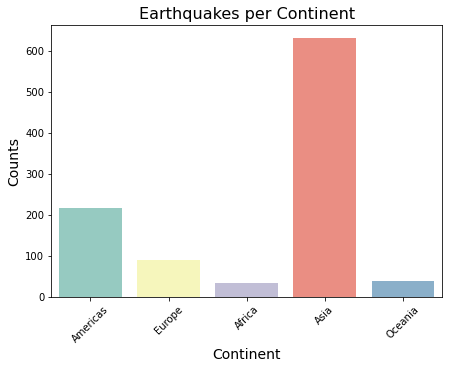

In [35]:
continent_count = df['Continent'].value_counts()

print(continent_count)

fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(data = df,
               x= 'Continent',
               palette = "Set3",
               orient = 'h').set_xticklabels(ax.get_xticklabels(), rotation=45);
ax.set_title('Earthquakes per Continent', fontsize= 16)
ax.set_ylabel('Counts', fontsize=14);
ax.set_xlabel('Continent', fontsize=14);

In [51]:
year_range = ['1961', '2019']
df_filtered = df[df['Year'].isin(year_range)]

     
df.tail()

,Unnamed: 0,Year,country code,Continent,CPI,date,depth,mag,mmi,Population density (people per sq. km of land area),...,Rural population (% of total population),Urban population,Urban population (% of total population),Urban population growth (annual %),GDP (constant 2015 US$),GDP (current US$),GDP growth (annual %),GDP per capita (constant 2015 US$),country,Total Affected
1006,1006,2019,IRN,Asia,98.781448,2019-07-08,19.00,5.6,6.526,50.9061451656475,...,24.609,62509613,75.391,2.00836101168209,396745289342.132,258245497664.394,-6.78422367041092,4785.0278763552,Iran,2100.0
1007,1007,2019,PAK,Asia,98.781448,2019-09-24,10.00,5.4,7.188,280.93259262142,...,63.093,79927762,36.907,2.67810181020819,322607305056.708,279056608888.638,1.14474960525021,1487.35722186437,Pakistan,130398.0
1008,1008,2019,PER,Americas,98.781448,2019-05-26,122.57,8.0,7.945,25.3987984375,...,21.901,25390346,78.099,1.86230109260482,214942684282.182,228470919605.669,2.2039747486556,6611.49276445785,Peru,4272.0
1009,1009,1979,TUR,Asia,28.041681,1979-07-18,10.00,5.2,6.000,55.8632628665722,...,56.645,18640067,43.355,3.22682779652106,177683353588.86,89394085658.2038,-0.624113570222889,4132.74354284057,Turkey,1000.0
1010,1010,2020,TUR,Asia,100.000000,2020-01-24,10.00,6.7,9.294,109.583913049128,...,23.895,64186247,76.105,1.7102872736367,1015326662715.27,719954821683.31,1.79355139618684,12035.0334481449,Turkey,70607.0


['mag', 'depth', 'mmi', 'CPI', 'Population density (people per sq. km of land area)', 'Rural population (% of total population)', 'Urban population (% of total population)', 'Population growth (annual %)', 'Urban population growth (annual %)', 'Population in largest city', 'Population in the largest city (% of urban population)', 'Population, total', 'Rural population', 'Urban population', 'GDP (constant 2015 US$)', 'GDP (current US$)', 'GDP growth (annual %)', 'GDP per capita (constant 2015 US$)', 'Total Affected']


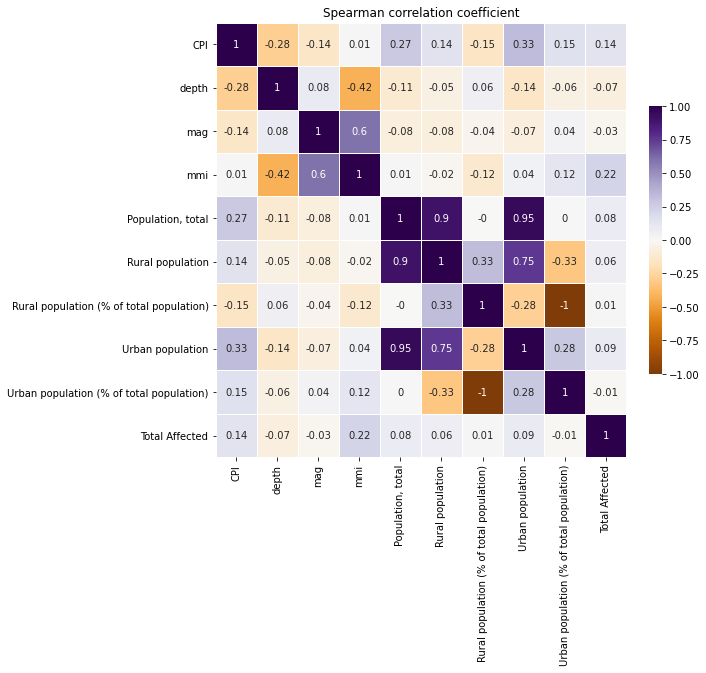

In [56]:
#add list of variables from merged
variables = list(df.columns)
keep = ['mag', 'depth', 'mmi', 'CPI', 'Population density (people per sq. km of land area)', 
        'Rural population (% of total population)', 'Urban population (% of total population)', 
       'Population growth (annual %)', 'Urban population growth (annual %)', 
       'Population in largest city', 'Population in the largest city (% of urban population)',
       'Population, total', 'Rural population', 'Urban population', 
        'GDP (constant 2015 US$)', 'GDP (current US$)', 'GDP growth (annual %)', 
        'GDP per capita (constant 2015 US$)', 'Total Affected']

drop_corr = set(variables) - set(keep)

df_corr = df.drop(drop_corr, axis=1)

# Correlation matrix
corr_num = df_corr.corr(method = "spearman")


fig, ax = plt.subplots(figsize=(8,8))
#fig, ax = plt.subplots()

sns.heatmap(corr_num,
            annot = corr_num.round(2),
            #square=True,
            linewidth=1,# space between cells
            cmap="PuOr", 
            vmin=-1, vmax=1,
            cbar_kws={'fraction' : 0.03}, # shrink color bar
            ax = ax);
#ax.set(ylim=(0, 95));

ax.set_title("Spearman correlation coefficient");

print(keep)